<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/UseCase_4/Durchfuehrung%20der%20Regressionsanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Git-Repository klonen sowie pullen**

In [1]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

Cloning into 'Applied-Data-Analytics'...
remote: Enumerating objects: 474, done.
remote: Counting objects: 100% (315/315), done.
remote: Compressing objects: 100% (301/301), done.
remote: Total 474 (delta 131), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (474/474), 3.21 MiB | 9.34 MiB/s, done.
Resolving deltas: 100% (188/188), done.


**Zu dem UseCase_4-Pfad wechseln**

In [2]:
%cd /content/Applied-Data-Analytics/UseCase_4

/content/Applied-Data-Analytics/UseCase_4


**Importieren von benötigten Bibliotheken sowie Lesen der CSV-Datei**

In [208]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
import seaborn as sns  

filepath = 'Einkommen_und_Verkaeufe_UseCase_4.csv' # Bereinigte Daten für Usecase 4
df = pd.read_csv(filepath, decimal='.')

In [182]:
df

,Unnamed: 0,YearlyIncome,Male,Age,YearlyPurchases
0,0,26016,0,29,2
1,1,8964,0,26,3
2,2,91620,0,26,4
3,3,15936,0,23,5
4,4,102768,0,27,4
...,...,...,...,...,...
995,995,4932,0,31,3
996,996,1956,0,28,4
997,997,29712,1,26,3
998,998,12012,0,29,1


In [209]:
df.loc[df['YearlyPurchases'] == 2, 'YearlyIncome'] *= 2#1.2
df.loc[df['YearlyPurchases'] == 3, 'YearlyIncome'] *= 3#1.3
df.loc[df['YearlyPurchases'] == 4, 'YearlyIncome'] *= 4#1.4
df.loc[df['YearlyPurchases'] == 5, 'YearlyIncome'] *= 5#1.5

df.loc[df['YearlyPurchases'] == 2, 'Age'] += 2 
df.loc[df['YearlyPurchases'] == 3, 'Age'] += 3 
df.loc[df['YearlyPurchases'] == 4, 'Age'] += 4 
df.loc[df['YearlyPurchases'] == 5, 'Age'] += 5 

df.loc[df['Age'] >= 34, 'Age'] = 34
df[['YearlyIncome']] = df[['YearlyIncome']].apply(np.int64)

**Nicht benötigte 'Unnamed'-Spalte entfernt**

In [210]:
df.drop(columns= ['Unnamed: 0'], inplace = True)

In [211]:
df_1 = df.drop(['Male', 'Age'], axis=1)

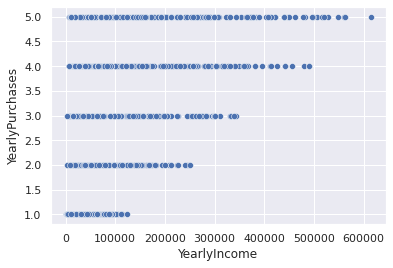

In [212]:
sns.scatterplot(data=df_1, x="YearlyIncome", y="YearlyPurchases")

In [187]:
df.groupby(["YearlyPurchases"]).describe().T

YearlyPurchases                 1              2  ...              4              5
YearlyIncome count     208.000000     194.000000  ...     206.000000     188.000000
             mean    40266.634615   43561.886598  ...   52310.126214   62556.414894
             std     29878.689913   34388.749634  ...   41689.902779   44326.740802
             min      1584.000000    2318.000000  ...    2251.000000    2286.000000
             25%     15552.000000   17755.000000  ...   18290.500000   24399.000000
             50%     31290.000000   31953.500000  ...   40765.000000   53541.000000
             75%     59307.000000   60116.250000  ...   77170.750000   91440.000000
             max    124140.000000  150134.000000  ...  171780.000000  184284.000000
Male         count     208.000000     194.000000  ...     206.000000     188.000000
             mean        0.490385       0.536082  ...       0.495146       0.515957
             std         0.501114       0.499987  ...       0.501194       0.501080
             min         0.000000       0.000000  ...       0.000000       0.000000
             25%         0.000000       0.000000  ...       0.000000       0.000000
             50%         0.000000       1.000000  ...       0.000000       1.000000
             75%         1.000000       1.000000  ...       1.000000       1.000000
             max         1.000000       1.000000  ...       1.000000       1.000000
Age          count     208.000000     194.000000  ...     206.000000     188.000000
             mean       25.341346      27.417526  ...      29.480583      30.148936
             std         4.980525       4.793768  ...       4.003305       3.750101
             min        18.000000      20.000000  ...      22.000000      23.000000
             25%        21.000000      23.000000  ...      26.000000      27.000000
             50%        25.500000      27.500000  ...      30.000000      30.500000
             75%        29.000000      32.000000  ...      34.000000      34.000000
             max        34.000000      34.000000  ...      34.000000      34.000000

[24 rows x 5 columns]

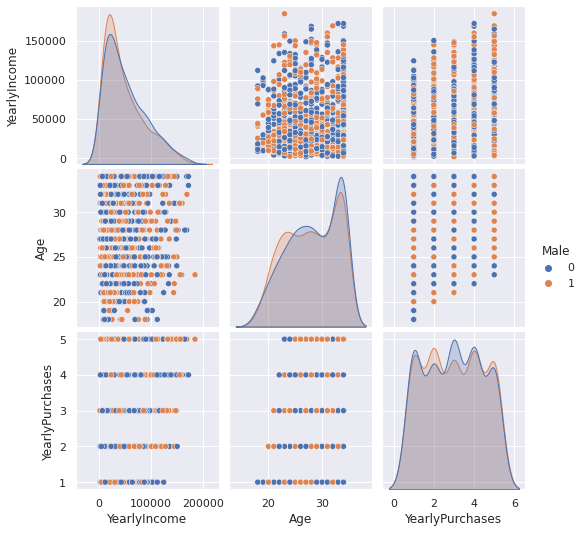

In [130]:
sns.pairplot(data=df, hue="Male");

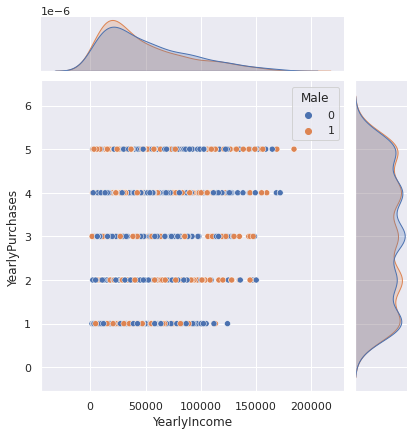

In [131]:
sns.jointplot(x="YearlyIncome", y="YearlyPurchases", hue="Male", data=df);

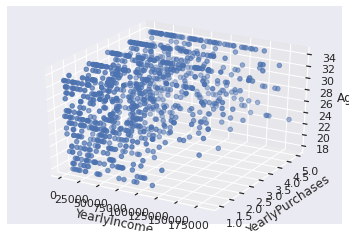

In [132]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['YearlyIncome']
y = df['YearlyPurchases']
z = df['Age']

ax.set_xlabel("YearlyIncome")
ax.set_ylabel("YearlyPurchases")
ax.set_zlabel("Age")

ax.scatter(x, y, z) #, hue = "Male"

plt.show()

In [188]:
df["YearlyPurchases"].mean()

2.972

In [189]:
y = df['YearlyPurchases']

In [190]:
X_numerical = df.drop(['YearlyPurchases'], axis=1)

In [191]:
list_numerical = X_numerical.columns
list_numerical

Index(['YearlyIncome', 'Male', 'Age'], dtype='object')

In [192]:
X = pd.DataFrame(X_numerical)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearlyIncome  1000 non-null   int64
 1   Male          1000 non-null   int64
 2   Age           1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [194]:
X_train.head()

,YearlyIncome,Male,Age
742,63468,1,32
676,96516,0,34
571,93996,0,25
99,16614,1,34
78,75504,1,18


In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [196]:
X_train

,YearlyIncome,Male,Age
742,0.347486,0.985815,0.813533
676,1.210069,-1.014389,1.238354
571,1.144295,-1.014389,-0.673342
99,-0.875447,0.985815,1.238354
78,0.661637,0.985815,-2.160217
...,...,...,...
320,-0.987107,0.985815,-0.673342
527,-0.485969,0.985815,-1.310574
996,-1.237623,-1.014389,0.813533
125,-1.018950,0.985815,-0.885753


In [222]:
y_train

742    5
676    1
571    1
99     3
78     1
      ..
320    1
527    1
996    4
125    2
265    5
Name: YearlyPurchases, Length: 700, dtype: int64

In [271]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.007459664577981981)
reg.fit(X_train, y_train)

Lasso(alpha=0.007459664577981981)

In [286]:
y_pred = reg.predict(X_test)

,YearlyIncome,Male,Age
841,-0.614072,-1.014389,-0.460931
956,-0.489727,-1.014389,-0.460931
544,1.241704,0.985815,-1.522985
173,0.110724,-1.014389,-0.460931
759,-0.858534,0.985815,1.238354
...,...,...,...
949,2.764693,0.985815,-1.098163
802,-0.921593,-1.014389,-1.522985
293,-0.915199,0.985815,0.176301
414,2.458372,-1.014389,0.601122


In [282]:
y_pred=np.rint(y_pred)
y_pred = [int(x) for x in y_pred]
#y_pred
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
print(rmse)

1.3038404810405297


In [284]:
y_test

841    1
956    2
544    1
173    3
759    5
      ..
949    5
802    2
293    2
414    5
260    1
Name: YearlyPurchases, Length: 300, dtype: int64

In [287]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 15.58
R squared test set 16.14


In [264]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)

train_test_df = pd.DataFrame(
    {'pred': y_pred,
     'test': y_test,
    })

train_test_df.round(0)

,pred,test
841,3.0,1
956,3.0,2
544,3.0,1
173,3.0,3
759,3.0,5
...,...,...
949,3.0,5
802,2.0,2
293,3.0,2
414,4.0,5


In [268]:
print(reg.coef_)

[0.25408477 0.02588578 0.48200107]


In [269]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 15.58
R squared test set 16.14


In [288]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
pred_train = np.rint(pred_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
pred = np.rint(pred)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 1.77
MSE test set 1.7


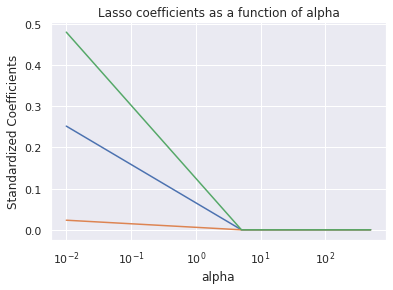

In [275]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [201]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [202]:
model.alpha_

0.007459664577981981

In [203]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.007459664577981981)

In [204]:
print(list(zip(lasso_best.coef_, X)))

[(0.2540847677140662, 'YearlyIncome'), (0.025885782212913655, 'Male'), (0.4820010710951376, 'Age')]


In [205]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 15.58
R squared test set 16.14


In [206]:
mean_squared_error(y_test, lasso_best.predict(X_test))

1.6491647015342612

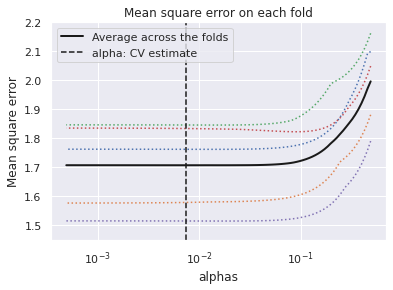

In [207]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 1.45, 2.2
plt.ylim(ymin, ymax);